# 已成功推送。下一步从Hub仓库拉取进行检验，
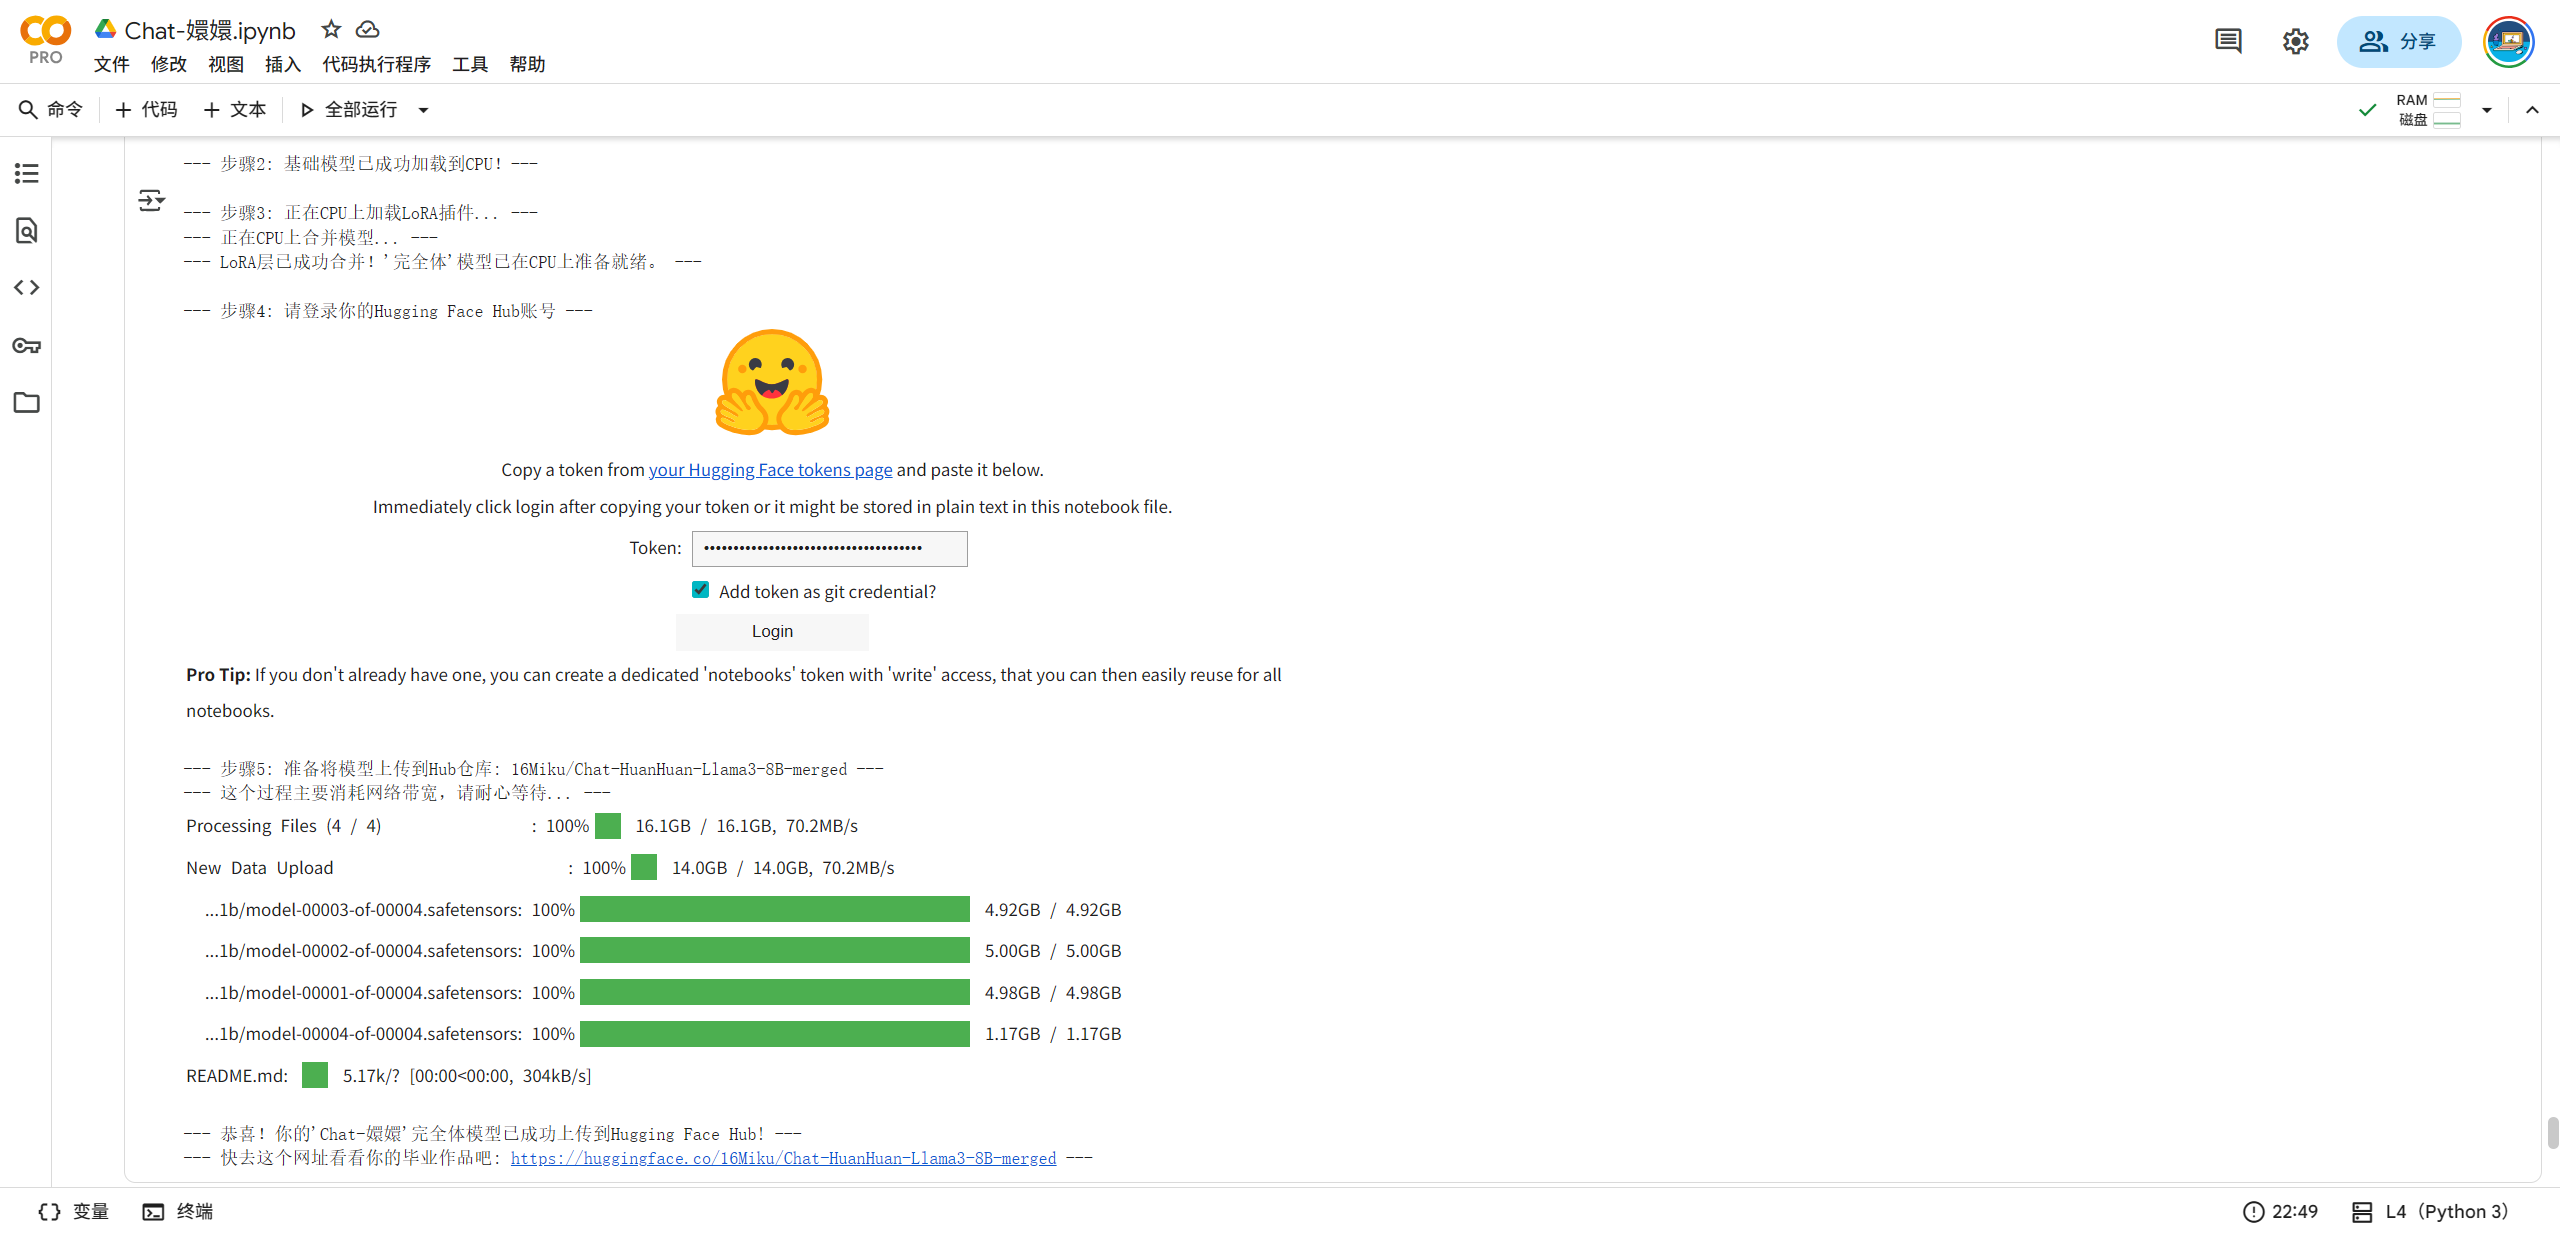

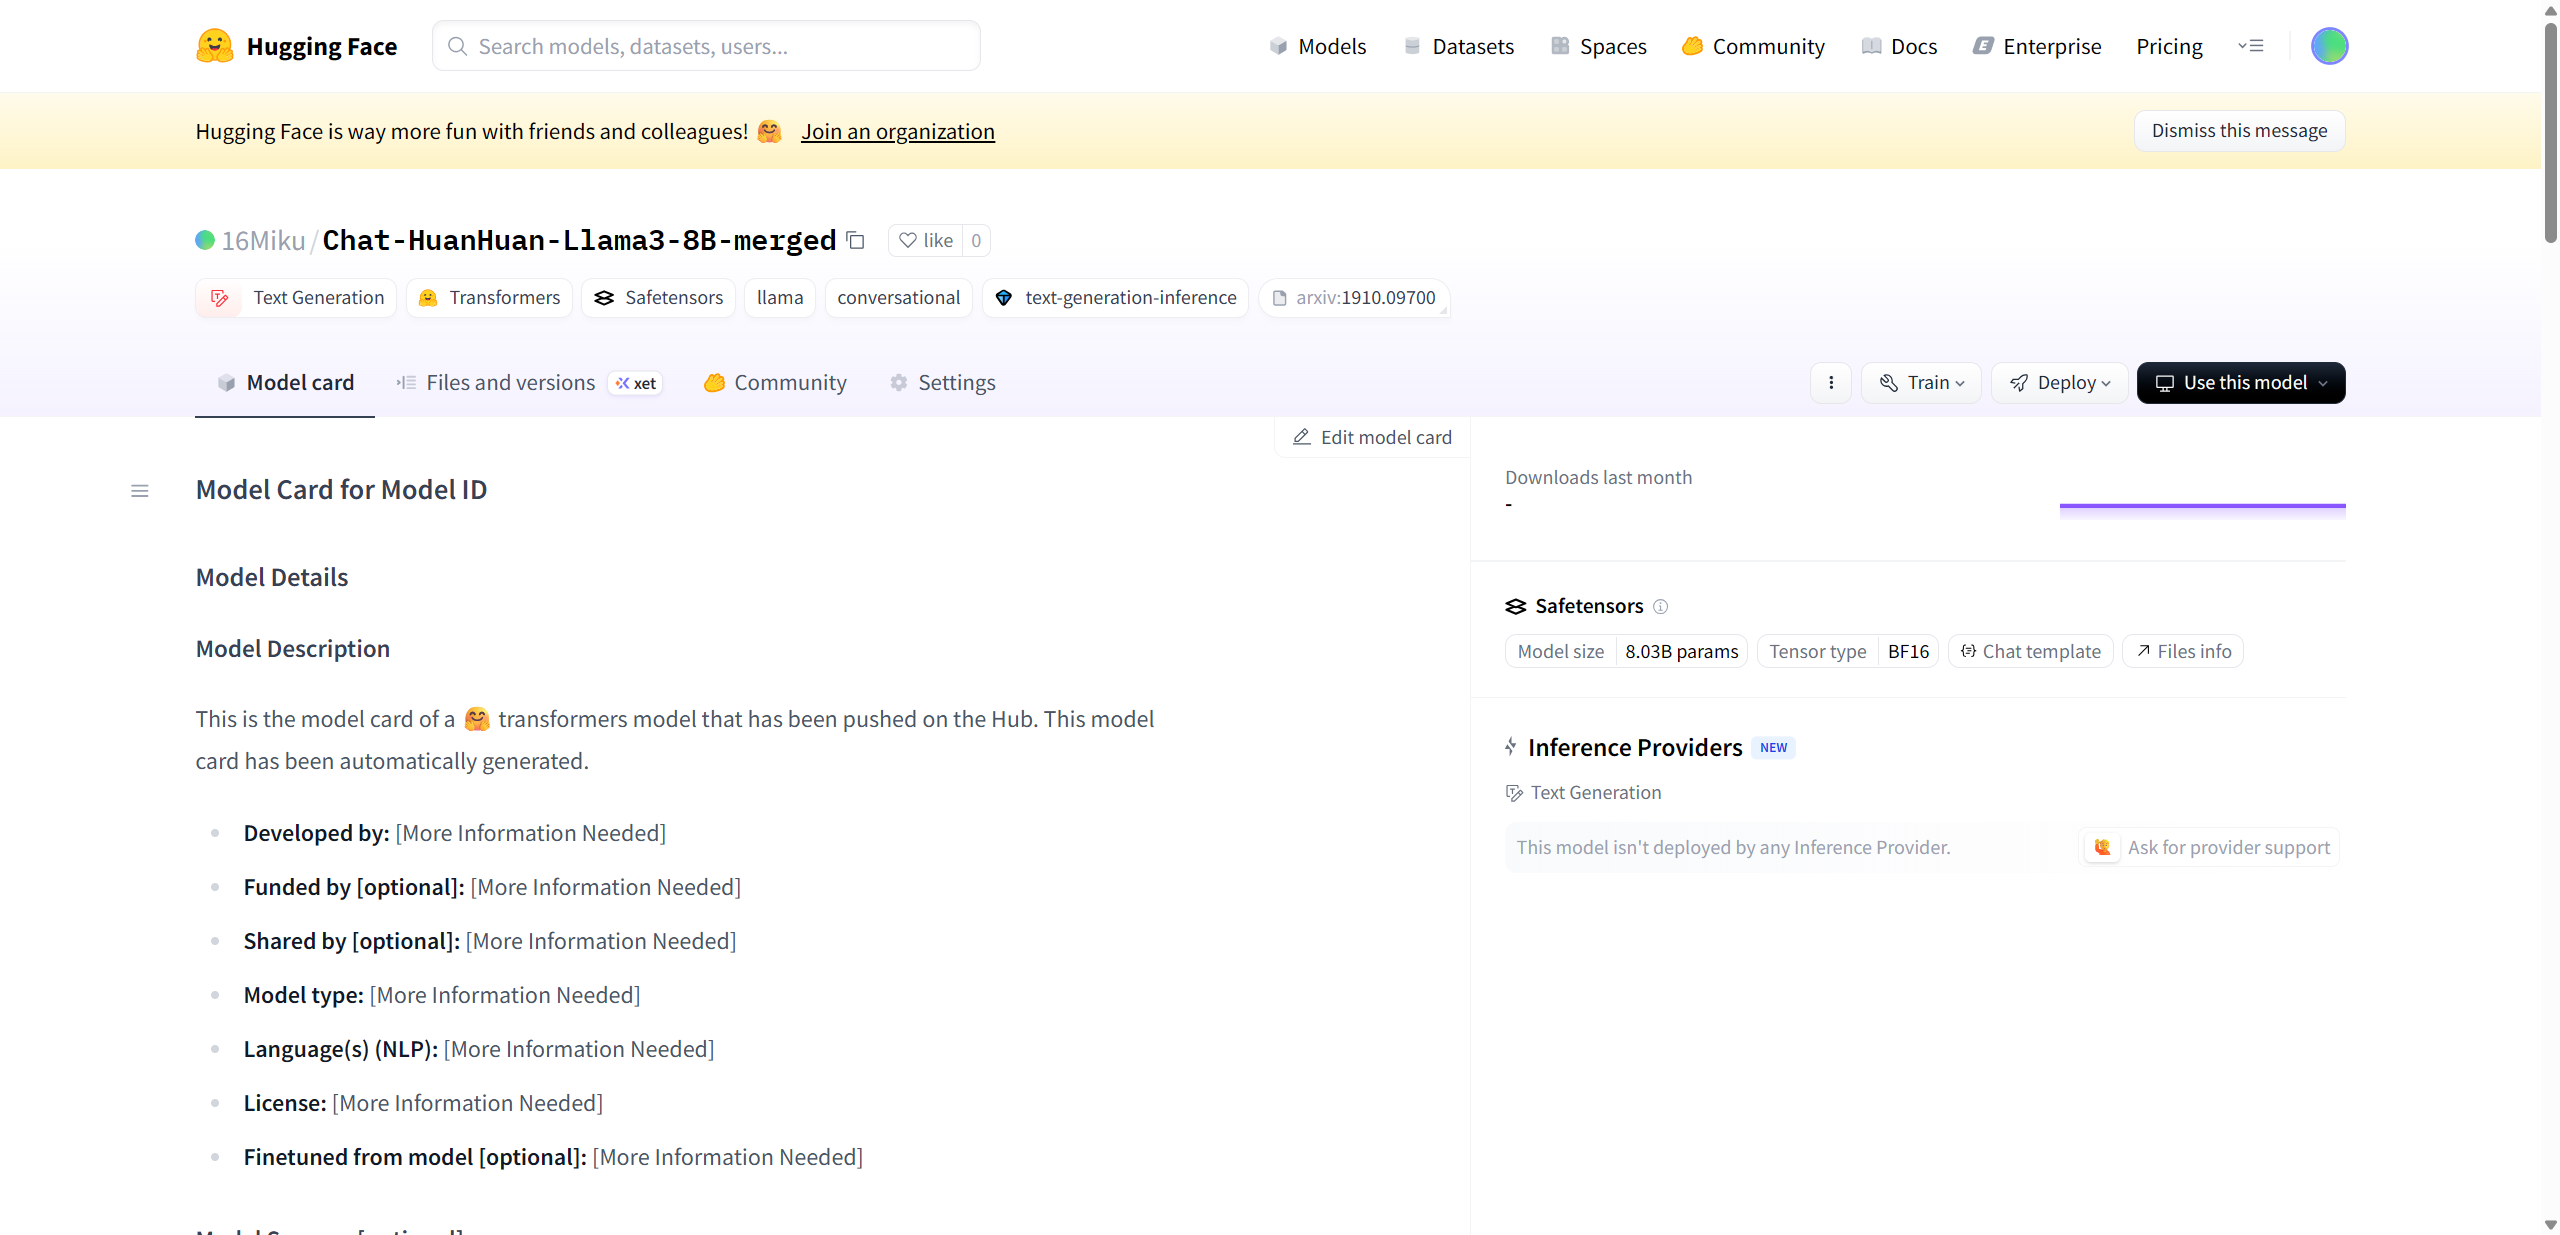

In [3]:
# ----------------------------------------------------------------------------------
# 最终章 Part 2: 王者归来 - 从云端唤醒你的专属AI
# ----------------------------------------------------------------------------------

# --- 步骤1: 环境准备 ---
# 作为一个新用户，我们只需要安装最核心的库即可。
!pip install -q transformers accelerate torch sentencepiece

from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# --- 步骤2: 仅凭“名号”，从Hub一键召唤！ ---

# !! 关键 !! 这里是我们唯一的“魔法咒语”——你刚刚上传到Hub的模型ID。
# !! 请务必替换成 '你的用户名/你的模型名' 格式 !!
hub_model_id = "16Miku/Chat-HuanHuan-Llama3-8B-merged" # <--- !! 修改这里 !!

print(f"--- 正在从Hugging Face Hub加载你的专属模型: {hub_model_id} ---")
print("--- 首次加载需要下载模型文件，请耐心等待... ---")


# --- 核心步骤 ---
# 我们使用和之前完全一样的 from_pretrained 方法。
# 但这次的输入，不再是本地路径，而是你在Hub上的模型ID！
# Transformers库会自动处理下载、缓存和加载的所有细节。
# 我们依然使用 bfloat16 和 device_map="auto" 来在Colab上高效运行。
final_model = AutoModelForCausalLM.from_pretrained(
    hub_model_id,
    device_map="auto",
    torch_dtype=torch.bfloat16,
    trust_remote_code=True
)
final_tokenizer = AutoTokenizer.from_pretrained(hub_model_id, trust_remote_code=True)

print("\n--- “Chat-嬛嬛”已从云端成功归来，并准备就绪！ ---")


# ----------------------------------------------------------------------------------
# 步骤3: 进行一场王者级的对话
# ----------------------------------------------------------------------------------
# 让我们用一个更深入的问题，来测试“嬛嬛”的智慧和人设。
prompt = "若是让你评价宫里的皇后，你会如何说？"

messages = [
    {"role": "system", "content": "你是在清朝宫廷中生活的女子——甄嬛。你言辞优雅、心思缜密，饱读诗书，洞察人心。请用甄嬛的身份和口吻，来回答我的问题。"},
    {"role": "user", "content": prompt}
]
input_text = final_tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
model_inputs = final_tokenizer([input_text], return_tensors="pt").to(final_model.device)

# 生成回答
generated_ids = final_model.generate(
    model_inputs.input_ids,
    max_new_tokens=512,
    do_sample=True,
    top_p=0.9,
    temperature=0.7, # 稍微调高一点温度，让她的话更有“味道”
)
generated_ids = [
    output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)
]
response = final_tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

print("\n--------------------------------")
print('你的提问：', prompt)
print('Chat-嬛嬛：', response)
print("--------------------------------")

--- 正在从Hugging Face Hub加载你的专属模型: 16Miku/Chat-HuanHuan-Llama3-8B-merged ---
--- 首次加载需要下载模型文件，请耐心等待... ---


config.json:   0%|          | 0.00/936 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.



--- “Chat-嬛嬛”已从云端成功归来，并准备就绪！ ---

--------------------------------
你的提问： 若是让你评价宫里的皇后，你会如何说？
Chat-嬛嬛： 皇后是皇上心中的至爱，自然是圣明睿智的。
--------------------------------
